In [169]:
!pip install pandas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [170]:
a_file = open('smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.010', "r")
lines = a_file.readlines()
a_file.close()

new_file = open("smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.010", "w")
for line in lines:
    if line.strip("\n") != "line1":
        new_file.write(line)
        
new_file.close()

In [171]:
def clean_files(file_name):

    lines = []

    with open(file_name, "r") as fp:
        lines = fp.readlines()

    with open(file_name, "w") as fp:
        for number, line in enumerate(lines):
            if number == 0:
                fp.write('Trail# SensorPosition SensorNumber SensorValue\n')
            if number not in [0,1,2,3,4]:
                fp.write(line)
        

In [172]:
c_n_files = ['c_n_co2c0000337/co2c0000337.rd.021','c_n_co2c0000337/co2c0000337.rd.029','c_n_co2c0000337/co2c0000337.rd.033','c_n_co2c0000337/co2c0000337.rd.043','c_n_co2c0000337/co2c0000337.rd.053','c_n_co2c0000337/co2c0000337.rd.067','c_n_co2c0000337/co2c0000337.rd.073','c_n_co2c0000337/co2c0000337.rd.083','c_n_co2c0000337/co2c0000337.rd.087','c_n_co2c0000337/co2c0000337.rd.089']
c_m_files = ['c_m_co2c0000337/co2c0000337.rd.017','c_m_co2c0000337/co2c0000337.rd.023','c_m_co2c0000337/co2c0000337.rd.025','c_m_co2c0000337/co2c0000337.rd.027','c_m_co2c0000337/co2c0000337.rd.041','c_m_co2c0000337/co2c0000337.rd.047','c_m_co2c0000337/co2c0000337.rd.051','c_m_co2c0000337/co2c0000337.rd.055','c_m_co2c0000337/co2c0000337.rd.065','c_m_co2c0000337/co2c0000337.rd.071']
c_1_files = ['c_1_co2c0000337/co2c0000337.rd.000','c_1_co2c0000337/co2c0000337.rd.002','c_1_co2c0000337/co2c0000337.rd.016','c_1_co2c0000337/co2c0000337.rd.024','c_1_co2c0000337/co2c0000337.rd.026','c_1_co2c0000337/co2c0000337.rd.028','c_1_co2c0000337/co2c0000337.rd.030','c_1_co2c0000337/co2c0000337.rd.032','c_1_co2c0000337/co2c0000337.rd.034','c_1_co2c0000337/co2c0000337.rd.036']

In [173]:
a_1_files = ['a_1_co2a0000364/co2a0000364.rd.000', 'a_1_co2a0000364/co2a0000364.rd.002', 'a_1_co2a0000364/co2a0000364.rd.010', 'a_1_co2a0000364/co2a0000364.rd.012', 'a_1_co2a0000364/co2a0000364.rd.014','a_1_co2a0000364/co2a0000364.rd.018', 'a_1_co2a0000364/co2a0000364.rd.020', 'a_1_co2a0000364/co2a0000364.rd.022', 'a_1_co2a0000364/co2a0000364.rd.024', 'a_1_co2a0000364/co2a0000364.rd.028']
a_m_files = ['a_m_co2a0000364/co2a0000364.rd.009', 'a_m_co2a0000364/co2a0000364.rd.017', 'a_m_co2a0000364/co2a0000364.rd.023', 'a_m_co2a0000364/co2a0000364.rd.025', 'a_m_co2a0000364/co2a0000364.rd.027','a_m_co2a0000364/co2a0000364.rd.037', 'a_m_co2a0000364/co2a0000364.rd.041', 'a_m_co2a0000364/co2a0000364.rd.047', 'a_m_co2a0000364/co2a0000364.rd.055', 'a_m_co2a0000364/co2a0000364.rd.061']
a_n_files = ['a_n_co2a0000364/co2a0000364.rd.007', 'a_n_co2a0000364/co2a0000364.rd.015', 'a_n_co2a0000364/co2a0000364.rd.019', 'a_n_co2a0000364/co2a0000364.rd.031', 'a_n_co2a0000364/co2a0000364.rd.039','a_n_co2a0000364/co2a0000364.rd.043', 'a_n_co2a0000364/co2a0000364.rd.045', 'a_n_co2a0000364/co2a0000364.rd.049', 'a_n_co2a0000364/co2a0000364.rd.057', 'a_n_co2a0000364/co2a0000364.rd.059']

In [174]:
file_list_c = [c_n_files,c_m_files,c_1_files]
file_list_a = [a_1_files,a_m_files,a_n_files]

In [175]:
for a in file_list_a:
    for file in a:
        clean_files(f"smni_eeg_data/{file}")

In [176]:
for c in file_list_c:
    for file in c:
        clean_files(f"smni_eeg_data/{file}")

In [177]:
import os

In [178]:
df = pd.DataFrame(columns=['Trail#','SensorPosition','SensorNumber','SensorValue'])

In [179]:
for c in file_list_c:
    for i in c:
        temp_df = pd.read_csv("smni_eeg_data/"+i, delimiter=' ')
        temp_df['alcoholic'] = temp_df['SensorValue'].apply([lambda x: 0])
        temp_df['paradigm'] = temp_df['SensorValue'].apply([lambda x: str(i[2])])     
        df = pd.concat([df, temp_df])

In [180]:
df

,Trail#,SensorPosition,SensorNumber,SensorValue,alcoholic,paradigm
0,21,FP1,16,5.096,0.0,n
1,21,FP1,17,5.585,0.0,n
2,21,FP1,18,5.096,0.0,n
3,21,FP1,19,4.120,0.0,n
4,21,FP1,20,2.167,0.0,n
...,...,...,...,...,...,...
16426,36,Y,251,-12.787,0.0,1
16427,36,Y,252,-14.252,0.0,1
16428,36,Y,253,-13.275,0.0,1
16429,36,Y,254,-10.834,0.0,1


In [181]:
for a in file_list_a:
    for i in a:
        temp_df = pd.read_csv("smni_eeg_data/"+i, delimiter=' ')
        temp_df['alcoholic'] = temp_df['SensorValue'].apply([lambda x: 1])
        temp_df['paradigm'] = temp_df['SensorValue'].apply([lambda x: str(i[2])])   
        df = pd.concat([df, temp_df])

In [182]:
df[df['Trail#'] == '59']

,Trail#,SensorPosition,SensorNumber,SensorValue,alcoholic,paradigm
0,59,FP1,16,4.150,1.0,n
1,59,FP1,17,3.174,1.0,n
2,59,FP1,18,2.197,1.0,n
3,59,FP1,19,1.709,1.0,n
4,59,FP1,20,2.197,1.0,n
...,...,...,...,...,...,...
16426,59,Y,251,-8.545,1.0,n
16427,59,Y,252,-8.057,1.0,n
16428,59,Y,253,-8.057,1.0,n
16429,59,Y,254,-6.592,1.0,n


In [183]:
df = df.loc[df.SensorNumber != 'chan']

In [184]:
df['paradigm_class'] = df['paradigm'].replace({'n':0, '1':1, 'm':2})

In [185]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [186]:
X = df[df['paradigm'] == 'n'][['SensorValue','paradigm_class','SensorNumber']]
y = df[df['paradigm'] == 'n']['alcoholic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [187]:
clf = RidgeClassifier().fit(X,y)

In [188]:
clf.score(X,y)

0.5706042277614858

In [189]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [190]:
scaler = MinMaxScaler(feature_range= (-1,1), )
scaler.fit(X)

MinMaxScaler(feature_range=(-1, 1))

In [191]:
X = scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# clf = svm.SVC()
# clf.fit(X,y)

In [192]:
df['Trail#'].unique()

array(['21', '29', '33', '43', '53', '67', '73', '83', '87', '89', '17',
       '23', '25', '27', '41', '47', '51', '55', '65', '71', '0', '2',
       '16', '24', '26', '28', '30', '32', '34', '36', '10', '12', '14',
       '18', '20', '22', '9', '37', '61', '7', '15', '19', '31', '39',
       '45', '49', '57', '59'], dtype=object)

In [193]:
frames = []
for i in df['Trail#'].unique():
    
    old_piece = df[df['Trail#'] == i]
    piece = df[df['Trail#'] == i]
    piece = piece.drop(['SensorNumber','SensorValue'],axis = 1)
    piece = piece[:64]
    piece['SensorPosition'] = df.SensorPosition.unique()
    
    for j in df.SensorNumber.unique()[:-1]:
        
        x = pd.Series(old_piece[old_piece['SensorNumber']==j]['SensorValue'])

        x = x.reset_index(drop = True)
        piece[j] = x
    frames.append(piece)
    
final = pd.concat(frames)
final


/var/folders/bf/bsy763hn04s504nx829tyrx80000gn/T/ipykernel_12133/2975024201.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  piece[j] = x


,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,16,17,18,19,20,...,5,6,7,8,9,10,11,12,13,14
0,21,FP1,0.0,n,0,5.096,5.585,5.096,4.120,2.167,...,-6.154,-5.666,-5.178,-3.713,-0.295,3.611,7.517,8.494,7.029,4.588
1,21,FP2,0.0,n,0,3.611,5.076,6.053,6.053,4.588,...,-7.253,-3.347,-1.882,-2.370,-2.858,-1.882,0.071,0.071,-1.882,-4.323
2,21,F7,0.0,n,0,0.071,4.954,7.395,6.907,3.977,...,-6.978,-8.931,-8.443,-3.072,5.229,12.553,14.994,12.553,8.158,4.740
3,21,F8,0.0,n,0,6.694,9.135,9.623,8.647,7.182,...,-4.517,-3.540,-3.052,-1.587,0.366,2.808,3.784,4.272,3.296,2.319
4,21,AF1,0.0,n,0,3.784,4.761,5.737,5.249,4.272,...,-3.591,-3.103,-2.614,-1.638,0.804,4.222,6.663,7.640,6.663,4.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,P2,1.0,n,0,-4.506,-4.506,-3.530,-2.553,-1.577,...,-1.190,-2.167,-2.655,-2.655,-2.655,-2.655,-2.655,-3.143,-3.632,-4.120
60,59,P1,1.0,n,0,-4.120,-3.632,-2.655,-1.678,-1.190,...,-0.427,-0.916,-0.916,-0.916,-1.404,-0.916,-1.404,-1.404,-1.404,-1.404
61,59,CPZ,1.0,n,0,-1.892,-1.892,-1.892,-1.892,-1.404,...,2.319,1.343,0.854,1.343,1.831,2.808,3.296,3.784,3.784,4.272
62,59,nd,1.0,n,0,3.784,3.296,2.319,1.831,2.319,...,4.150,3.662,5.127,7.568,8.057,6.592,3.662,0.732,0.244,2.197


In [194]:
final

,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,16,17,18,19,20,...,5,6,7,8,9,10,11,12,13,14
0,21,FP1,0.0,n,0,5.096,5.585,5.096,4.120,2.167,...,-6.154,-5.666,-5.178,-3.713,-0.295,3.611,7.517,8.494,7.029,4.588
1,21,FP2,0.0,n,0,3.611,5.076,6.053,6.053,4.588,...,-7.253,-3.347,-1.882,-2.370,-2.858,-1.882,0.071,0.071,-1.882,-4.323
2,21,F7,0.0,n,0,0.071,4.954,7.395,6.907,3.977,...,-6.978,-8.931,-8.443,-3.072,5.229,12.553,14.994,12.553,8.158,4.740
3,21,F8,0.0,n,0,6.694,9.135,9.623,8.647,7.182,...,-4.517,-3.540,-3.052,-1.587,0.366,2.808,3.784,4.272,3.296,2.319
4,21,AF1,0.0,n,0,3.784,4.761,5.737,5.249,4.272,...,-3.591,-3.103,-2.614,-1.638,0.804,4.222,6.663,7.640,6.663,4.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,P2,1.0,n,0,-4.506,-4.506,-3.530,-2.553,-1.577,...,-1.190,-2.167,-2.655,-2.655,-2.655,-2.655,-2.655,-3.143,-3.632,-4.120
60,59,P1,1.0,n,0,-4.120,-3.632,-2.655,-1.678,-1.190,...,-0.427,-0.916,-0.916,-0.916,-1.404,-0.916,-1.404,-1.404,-1.404,-1.404
61,59,CPZ,1.0,n,0,-1.892,-1.892,-1.892,-1.892,-1.404,...,2.319,1.343,0.854,1.343,1.831,2.808,3.296,3.784,3.784,4.272
62,59,nd,1.0,n,0,3.784,3.296,2.319,1.831,2.319,...,4.150,3.662,5.127,7.568,8.057,6.592,3.662,0.732,0.244,2.197


In [122]:
final2 = final.dropna()

In [124]:
final2

,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,12,13,14,15,16,...,1,2,3,4,5,6,7,8,9,10
0,21,FP1,0.0,n,0,5.585,6.561,6.073,5.585,5.096,...,-9.084,-10.061,-9.572,-7.619,-6.154,-5.666,-5.178,-3.713,-0.295,3.611
1,21,FP2,0.0,n,0,8.494,7.029,4.588,3.123,3.611,...,-0.417,-4.812,-9.694,-10.671,-7.253,-3.347,-1.882,-2.370,-2.858,-1.882
2,21,F7,0.0,n,0,0.071,-1.882,-4.323,-3.835,0.071,...,-11.373,-8.443,-6.002,-5.025,-6.978,-8.931,-8.443,-3.072,5.229,12.553
3,21,F8,0.0,n,0,12.553,8.158,4.740,4.740,6.694,...,-6.470,-7.446,-6.958,-5.493,-4.517,-3.540,-3.052,-1.587,0.366,2.808
4,21,AF1,0.0,n,0,4.272,3.296,2.319,2.808,3.784,...,-6.032,-7.009,-6.521,-5.056,-3.591,-3.103,-2.614,-1.638,0.804,4.222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,OZ,1.0,n,0,-1.078,-2.055,-3.031,-3.031,-2.055,...,1.353,0.376,-0.112,-0.600,-0.600,-0.600,-1.088,-1.088,-1.577,-2.065
59,59,P2,1.0,n,0,-2.065,-2.553,-3.042,-4.018,-4.506,...,0.275,-0.214,-0.702,-0.702,-1.190,-2.167,-2.655,-2.655,-2.655,-2.655
60,59,P1,1.0,n,0,-3.143,-3.632,-4.120,-4.120,-4.120,...,-0.427,-0.916,-0.916,-0.427,-0.427,-0.916,-0.916,-0.916,-1.404,-0.916
61,59,CPZ,1.0,n,0,-1.404,-1.404,-1.404,-1.404,-1.892,...,7.202,5.737,3.784,2.808,2.319,1.343,0.854,1.343,1.831,2.808


In [125]:
y = final2['alcoholic']
X = final2.drop(['alcoholic','SensorPosition',
                 'paradigm','paradigm_class','Trail#'],axis = 1)

In [126]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [127]:
model = LogisticRegression(solver = 'liblinear', random_state=0)

In [128]:
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [129]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [130]:
model = LogisticRegression(solver = 'liblinear', random_state=0).fit(X,y)


In [131]:
model.classes_

array([0., 1.])

In [132]:
model.intercept_

array([-0.29016947])

In [133]:
model.coef_

array([[ 0.25302128, -0.09571587, -0.14374082,  0.13052771,  0.17497426,
        -0.2035458 , -0.07031241,  0.30306174,  0.1132764 , -0.41105189,
         0.27136004,  0.33826685, -0.36282391, -0.17557957,  0.41981442,
         0.12242743, -0.43882045,  0.20402176,  0.1396219 , -0.00759781,
        -0.21977004, -0.23126639,  0.30362883, -0.09273147, -0.18473006,
        -0.04228631, -0.04799289,  0.44926783, -0.3259442 , -0.37662482,
         0.51331157, -0.28224764,  0.32650508, -0.52544815,  0.07277139,
         0.44492728, -0.30034819,  0.07106075, -0.04713361,  0.13814725,
         0.17330962, -0.32279007,  0.20997155, -0.0821428 ,  0.17870002,
        -0.23006888,  0.22263219, -0.18215036, -0.28849892,  0.19214808,
         0.10636703, -0.41743887, -0.11235638,  0.2340315 , -0.12605671,
         0.10288831, -0.43665794,  0.34881293,  0.10985977, -0.04315573,
        -0.30361361,  0.19405164,  0.0730862 , -0.01903834, -0.19121042,
         0.26637356, -0.13261862,  0.26852186, -0.2

In [135]:
model.predict_proba(X)

array([[9.94163601e-01, 5.83639854e-03],
       [9.97098182e-01, 2.90181816e-03],
       [7.48125179e-01, 2.51874821e-01],
       ...,
       [5.65233277e-02, 9.43476672e-01],
       [2.17101433e-01, 7.82898567e-01],
       [2.42611659e-04, 9.99757388e-01]])

In [136]:
model.predict(X)

array([0., 0., 0., ..., 1., 1., 1.])

In [137]:
model.score(X,y)

0.8873517786561265

In [138]:
confusion_matrix(y, model.predict(X))

array([[1743,  159],
       [ 183,  951]])

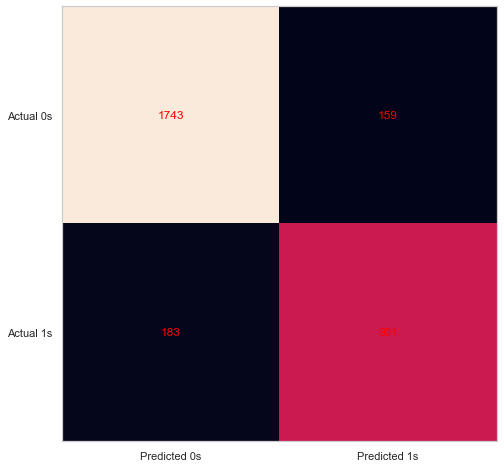

In [139]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()